In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Replace intermediary jurisdiction with officer base
jurisdiction_status_list = ['jurisdiction','officer_base','officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
338119,Indonesia,British Virgin Islands
338120,Cook Islands,British Virgin Islands
338121,Hong Kong,British Virgin Islands
338122,Cook Islands,United Kingdom


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


### Convert Data to an Undirected Edge List

In [7]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 2],
 ['Algeria', 'British Virgin Islands', 2],
 ['Algeria', 'United Kingdom', 2],
 ['Algeria', 'United States', 1],
 ['Andorra', 'Bahamas', 26],
 ['Andorra', 'British Virgin Islands', 43],
 ['Andorra', 'Cayman Islands', 1],
 ['Andorra', 'Costa Rica', 3],
 ['Andorra', 'Hong Kong', 9],
 ['Andorra', 'Ireland', 1],
 ['Andorra', 'Latvia', 1],
 ['Andorra', 'Nevada', 24],
 ['Andorra', 'Niue', 12],
 ['Andorra', 'Panama', 279],
 ['Andorra', 'Russia', 2],
 ['Andorra', 'Samoa', 9],
 ['Andorra', 'Seychelles', 72],
 ['Andorra', 'United Kingdom', 1],
 ['Andorra', 'Uruguay', 15],
 ['Angola', 'Bermuda', 1],
 ['Angola', 'British Virgin Islands', 12],
 ['Angola', 'China', 1],
 ['Antigua and Barbuda', 'Barbados', 8],
 ['Antigua and Barbuda', 'British Virgin Islands', 11],
 ['Antigua and Barbuda', 'Canada', 1],
 ['Antigua and Barbuda', 'Cayman Islands', 1],
 ['Antigua and Barbuda', 'China', 4],
 ['Antigua and Barbuda', 'Hong Kong', 4],
 ['Antigua and Barbuda', 'Ireland', 3],
 ['Ant

In [8]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
df_net = pd.DataFrame(result)
df_net

,0,1,2
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2337,Hong Kong,Zimbabwe,3
2338,Jersey,Zimbabwe,1
2339,Panama,Zimbabwe,3
2340,Russia,Zimbabwe,2


In [10]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

,node_1,node_2,weight
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2337,Hong Kong,Zimbabwe,3
2338,Jersey,Zimbabwe,1
2339,Panama,Zimbabwe,3
2340,Russia,Zimbabwe,2


In [11]:
#import df_net to csv later

In [12]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


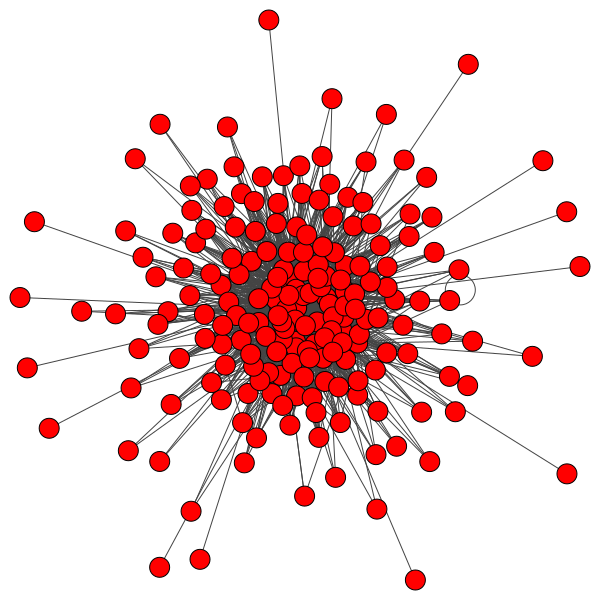

In [13]:
ig.plot(g)

In [14]:
g.diameter()

3

In [15]:
len(g.vs.indices)

195

In [16]:
#g.vs.indices
df_net['node_1'].value_counts()

British Virgin Islands    155
Bahamas                    94
Hong Kong                  89
China                      88
Canada                     78
                         ... 
Albania                     1
Tajikistan                  1
Haiti                       1
Nicaragua                   1
Paraguay                    1
Name: node_1, Length: 172, dtype: int64

In [17]:
uni =df_net['node_1'].unique()

In [18]:
len(uni)

172

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 8, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 9, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 10, {'name': 'Ireland'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd0bd336b80>, 11, {'name':

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,88.706186,0.01,3.0,-0.556797,24.041237,0.123288,1.919235
1,2,88.181347,0.01,3.0,-0.556667,24.072539,0.124085,1.918556
2,3,87.635417,0.02,3.0,-0.556691,24.145833,0.125108,1.917648
3,4,87.141361,0.02,3.0,-0.556428,24.136126,0.125709,1.917277
4,5,86.552632,0.03,3.0,-0.556370,24.231579,0.126867,1.915901


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.0,0.97,0.0,NaN,0.0,0.0,NaN
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,14.0,172.336410,-0.556115,3390.938144,0.122918,1.919716
1,2,0.01,14.0,172.297346,-0.559707,3401.170984,0.121895,1.921146
2,3,0.02,14.0,171.155105,-0.559544,3418.833333,0.122949,1.916667
3,4,0.02,14.0,170.377057,-0.560856,3432.680628,0.122546,1.917443
4,5,0.03,14.0,169.681746,-0.560661,3450.684211,0.123560,1.916291


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
180,181,0.92,12.0,13.000000,-0.713141,2296.428571,0.257143,1.653846
181,182,0.93,12.0,12.230769,-0.694309,2472.461538,0.274725,1.621212
182,183,0.93,19.0,7.000000,-0.707967,2585.500000,0.269231,1.618182
183,184,0.94,19.0,7.636364,-0.707967,2820.545455,0.318182,1.618182
184,185,0.94,67.0,6.300000,-0.714286,3094.800000,0.327273,1.600000
185,186,0.95,149.0,4.222222,-0.786802,2951.111111,0.244444,1.694444
186,187,0.95,149.0,3.625000,-0.777778,3319.250000,0.277778,1.642857
187,188,0.96,149.0,3.000000,-0.758621,3792.285714,0.321429,1.571429
188,189,0.96,101.0,2.166667,-0.833333,3910.666667,0.285714,1.600000
189,190,0.97,11713.0,1.200000,-1.000000,4686.400000,0.266667,1.600000


### Targeted attack

In [26]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,167062.0
9,9,Hong Kong,71103.0
14,14,Panama,57713.0
29,29,Switzerland,38964.0
179,179,Taiwan,30763.0
4,4,United Kingdom,26974.0
21,21,China,21204.0
1,1,Bahamas,20481.0
15,15,Russia,18156.0
17,17,Seychelles,17267.0


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
77,77,Grenada,14.0
93,93,Cuba,13.0
143,143,Mongolia,13.0
151,151,Nicaragua,13.0
124,124,Iran,12.0
137,137,Madagascar,12.0
83,83,Chad,11.0
149,149,Nauru,10.0
133,133,Libya,10.0
129,129,Kyrgyzstan,8.0


In [30]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Hong Kong',
 'Panama',
 'Switzerland',
 'Taiwan',
 'United Kingdom',
 'China',
 'Bahamas',
 'Russia',
 'Seychelles',
 'Jersey',
 'United States',
 'Singapore',
 'Luxembourg',
 'Niue',
 'United Arab Emirates',
 'Samoa',
 'Cyprus',
 'Guernsey',
 'Isle of Man',
 'Uruguay',
 'Indonesia',
 'Cayman Islands',
 'Ireland',
 'Monaco',
 'British Anguilla',
 'Malaysia',
 'Canada',
 'Bermuda',
 'Latvia',
 'Barbados',
 'Liechtenstein',
 'Gibraltar',
 'Thailand',
 'Colombia',
 'Ecuador',
 'Belize',
 'Saint Kitts and Nevis',
 'Jordan',
 'Mauritius',
 'Brazil',
 'Spain',
 'Nevada',
 'Guatemala',
 'Australia',
 'India',
 'Venezuela',
 'US Virgin Islands',
 'Costa Rica',
 'Malta',
 'Cook Islands',
 'Philippines',
 'Israel',
 'Japan',
 'Estonia',
 'Ukraine',
 'Germany',
 'France',
 'Netherlands',
 'Italy',
 'Dominican Republic',
 'Lebanon',
 'Andorra',
 'Labuan',
 'New Zealand',
 'Macao',
 'Argentina',
 'Greece',
 'South Korea',
 'Portugal',
 'South Africa',
 'Antigua and Barb

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,88.613402,4.0,-0.553618,22.288660,0.114301,1.967635
1,2,0.01,Hong Kong,88.647668,4.0,-0.544251,20.932642,0.107900,1.983785
2,3,0.02,Panama,85.265625,4.0,-0.536758,19.458333,0.100820,2.016201
3,4,0.02,Switzerland,85.068063,4.0,-0.541084,19.047120,0.099204,2.019898
4,5,0.03,Taiwan,84.831579,4.0,-0.545960,18.631579,0.097548,2.023170


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.97,Central African Republic,0.0,0.0,NaN,0.0,0.0,NaN
191,192,0.98,Sint Maarten (Dutch part),0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Yemen,0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Saint Martin (French part),0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Norfolk Island,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,159.772934,11.0,-0.553618,1670.216495,0.114301,1.967635
1,2,0.01,Hong Kong,157.814722,99.0,-0.544251,1330.808290,0.107900,1.983785
2,3,0.02,Panama,144.179242,11.0,-0.536758,811.531250,0.100820,2.016201
3,4,0.02,Switzerland,144.477918,11.0,-0.541084,740.492147,0.099204,2.019898
4,5,0.03,Taiwan,144.011079,11.0,-0.545960,614.094737,0.097548,2.023170
5,6,0.03,United Kingdom,143.238017,70.0,-0.538634,497.513228,0.091061,2.060714
6,7,0.04,China,141.225445,70.0,-0.530965,429.787234,0.086176,2.073351
7,8,0.04,Bahamas,138.584138,70.0,-0.524281,321.593583,0.081807,2.081735
8,9,0.05,Russia,136.719926,137.0,-0.514651,273.440860,0.075671,2.131939
9,10,0.05,Seychelles,121.325983,137.0,-0.505866,191.059459,0.070910,2.117780


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
45,46,0.23,India,21.028105,10.0,-0.215106,3.087248,0.007875,3.276735
46,47,0.24,Venezuela,20.535859,10.0,-0.223355,3.054054,0.007618,3.292517
47,48,0.24,US Virgin Islands,22.262974,12.0,-0.254511,2.884354,0.006895,3.409574
48,49,0.25,Costa Rica,15.543314,9.0,-0.282054,2.835616,0.006710,3.039735
49,50,0.26,Malta,9.638030,6.0,-0.253665,1.034483,0.006141,2.885431
...,...,...,...,...,...,...,...,...,...
190,191,0.97,Central African Republic,0.000000,0.0,NaN,0.000000,0.000000,NaN
191,192,0.98,Sint Maarten (Dutch part),0.000000,0.0,NaN,0.000000,0.000000,NaN
192,193,0.98,Yemen,0.000000,0.0,NaN,0.000000,0.000000,NaN
193,194,0.99,Saint Martin (French part),0.000000,0.0,NaN,0.000000,0.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted

#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

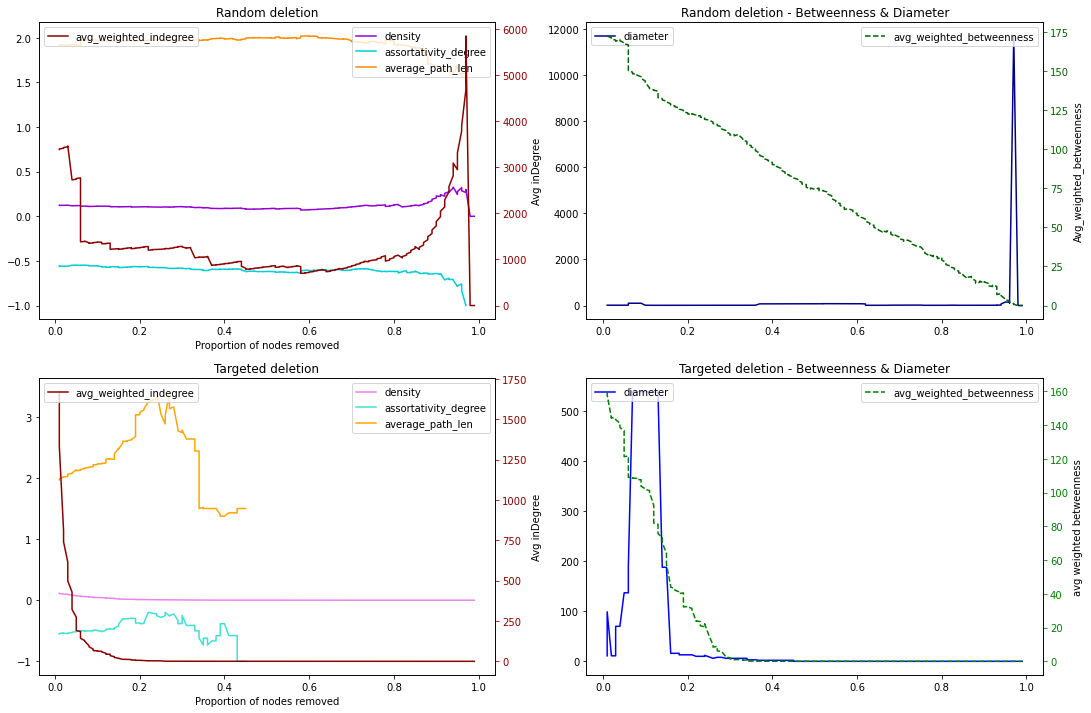

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()